In [37]:
# Bring your packages onto the path
import sys,os
sys.path.append(os.path.abspath(os.path.join('..'))) #'entropytriangle main directory

In [38]:
from entropytriangle import * #importing all modules necessary for the plotting
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
#df = pd.read_csv('Arthitris.csv',delimiter=',',index_col='Unnamed: 0')
#df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [51]:
#labels = df.columns.drop(['Class'])
#df['Bare Nuclei'] = df['Bare Nuclei'].fillna(int(0))
#df = discretization(df)
#df = df.drop(['Class'],axis = 1)
labels = df.columns.drop(['Species'])
df = discretization(df)
df = df.drop(['Species'],axis = 1)

/Users/jaime/Desktop/entropytriangle/entropytriangle/auxfunc.py:39: UserWarning: Discretizing data!
  warning("Discretizing data!")


In [52]:
x = df.loc[:, labels].values

In [53]:
x = StandardScaler().fit_transform(x)
#names = list(map(lambda x: "x"+str(x), range(len(df.columns)-1)))
principalDf = pd.DataFrame(data = x, columns= labels)

/anaconda3/envs/Jaime/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
li = list()
for i in range(len(df.columns)):
    pca = PCA(n_components = (len(df.columns)-1)-i)
    principalComponents = pca.fit_transform(x)
    columns = list(map(lambda x: "principal component " + str(x), range(len(df.columns)-1-i)))
    principalDf = pd.DataFrame(data = principalComponents, columns= columns)
    li.append(principalDf)

In [55]:
prueba = discretization(li[3])

SystemExit: Can only work with non-empty Data Frames!

/anaconda3/envs/Jaime/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [56]:
edf = jentropies_df(df,prueba)

SystemExit: Can only condition on variable lists with the same number of instances!

/anaconda3/envs/Jaime/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [57]:
edf

[       H_U        H_P   DeltaH_P       M_P      VI_P
 Type                                                
 X     27.0   6.943037  20.056963  4.691980  2.251057
 Y     24.0   6.657863  17.342137  4.691980  1.965883
 XY    51.0  13.600900  37.399100  9.383961  4.216940,
        H_U        H_P   DeltaH_P       M_P      VI_P
 Type                                                
 X     27.0   6.943037  20.056963  4.567918  2.375119
 Y     21.0   6.514691  14.485309  4.567918  1.946772
 XY    48.0  13.457728  34.542272  9.135837  4.321891,
        H_U        H_P   DeltaH_P       M_P      VI_P
 Type                                                
 X     27.0   6.943037  20.056963  4.345167  2.597871
 Y     18.0   6.164693  11.835307  4.345167  1.819526
 XY    45.0  13.107731  31.892269  8.690334  4.417397,
        H_U        H_P   DeltaH_P       M_P      VI_P
 Type                                                
 X     27.0   6.943037  20.056963  4.041306  2.901732
 Y     15.0   5.704660   

In [58]:
edf = list()
for i in range(len(li)-1):
    edf.append(jentropies_df(df,li[i])) 

/Users/jaime/Desktop/entropytriangle/entropytriangle/jentropies.py:137: UserWarning: Discretizing data from X DataFrame before entropy calculation!
  warning("Discretizing data from X DataFrame before entropy calculation!") #' Throwing a Warning for communicating a discretization of data
/Users/jaime/Desktop/entropytriangle/entropytriangle/auxfunc.py:39: UserWarning: Discretizing data!
  warning("Discretizing data!")
/Users/jaime/Desktop/entropytriangle/entropytriangle/jentropies.py:141: UserWarning: Discretizing data from Y DataFrame before entropy calculation!
  warning("Discretizing data from Y DataFrame before entropy calculation!") #' Throwing a Warning for communicating a discretization of data


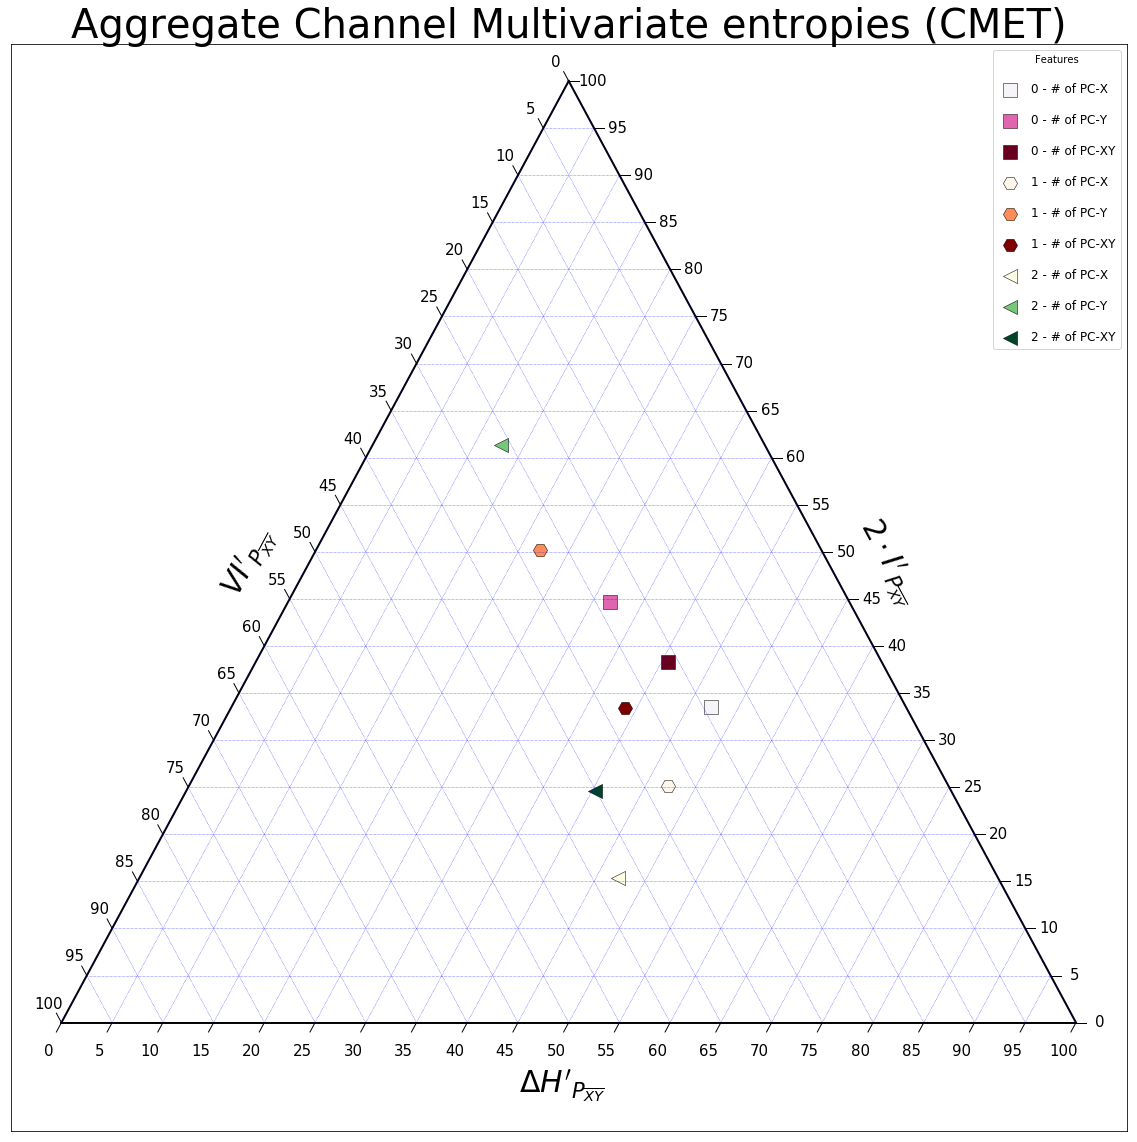

In [59]:
names = list(map(lambda x:  str(x) + " - # of PC", range(len(df.columns)-1)))
etplotjoint(edf,names)